# Drug Recommendation using Machine Learning 

### Importing the libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
drug_df = pd.read_csv(r"/home/xlr8/ml,dl,nlp,llm,genai,cv/ML-App4-Drug-Recommender-AI-App/drug_data_synthetic_v3.csv")

In [48]:
drug_df.shape

(3000, 6)

In [49]:
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,32,M,NORMAL,NORMAL,5.314,drugX
1,36,M,LOW,HIGH,18.162,drugY
2,37,M,NORMAL,NORMAL,14.238,drugA
3,50,F,NORMAL,HIGH,7.895,drugX
4,15,F,LOW,NORMAL,9.778,drugC


In [50]:
drug_df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
2995,46,F,NORMAL,HIGH,42.006,drugY
2996,54,M,LOW,HIGH,17.747,drugB
2997,23,F,HIGH,NORMAL,1.000,drugX
2998,72,M,NORMAL,HIGH,40.671,drugY
2999,61,M,LOW,HIGH,18.812,drugY


In [51]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          3000 non-null   int64  
 1   Sex          3000 non-null   object 
 2   BP           3000 non-null   object 
 3   Cholesterol  3000 non-null   object 
 4   Na_to_K      3000 non-null   float64
 5   Drug         3000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 140.8+ KB


In [52]:
drug_df.describe()

,Age,Na_to_K
count,3000.000000,3000.000000
mean,44.505667,16.220947
std,16.992966,9.357884
min,15.000000,1.000000
25%,32.000000,10.330750
50%,44.000000,15.186000
75%,57.000000,20.303500
max,90.000000,60.000000


### Data Pre-Processing/EDA

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
drug_df['Sex'].value_counts()

Sex
M    1571
F    1429
Name: count, dtype: int64

In [55]:
drug_df['BP'].value_counts()

BP
NORMAL    1315
LOW        945
HIGH       740
Name: count, dtype: int64

In [56]:
drug_df['Cholesterol'].value_counts()

Cholesterol
HIGH      1729
NORMAL    1271
Name: count, dtype: int64

#### Label Encoding Sex and Cholesterol columns

In [57]:
drug_df['Sex'] = LabelEncoder().fit_transform(drug_df['Sex'])
drug_df['Cholesterol'] = LabelEncoder().fit_transform(drug_df['Cholesterol'])

In [58]:
drug_df['Drug'].value_counts()

Drug
drugY    1087
drugX     606
drugA     530
drugC     394
drugB     383
Name: count, dtype: int64

In [59]:
drug_df['Drug'].unique()

array(['drugX', 'drugY', 'drugA', 'drugC', 'drugB'], dtype=object)

In [60]:
drug_df['Sex'].value_counts()

Sex
1    1571
0    1429
Name: count, dtype: int64

In [61]:
drug_df['Cholesterol'].value_counts()

Cholesterol
0    1729
1    1271
Name: count, dtype: int64

#### Creating dummy variables in BP column

In [62]:
dummy_BP = pd.get_dummies(drug_df["BP"], prefix="BP", prefix_sep="_")

In [63]:
dummy_BP.head()

,BP_HIGH,BP_LOW,BP_NORMAL
0,False,False,True
1,False,True,False
2,False,False,True
3,False,False,True
4,False,True,False


In [64]:
dummy_BP.drop("BP_NORMAL", axis=1, inplace=True)

In [65]:
dummy_BP.head()

,BP_HIGH,BP_LOW
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


#### Concating BP dummies to orginal dataset

In [66]:
drug_df.drop("BP", axis=1, inplace=True)

In [67]:
drug_df = pd.concat([drug_df, dummy_BP], axis=1)

In [68]:
drug_df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_LOW
0,32,1,1,5.314,drugX,False,False
1,36,1,0,18.162,drugY,False,True
2,37,1,1,14.238,drugA,False,False
3,50,0,0,7.895,drugX,False,False
4,15,0,1,9.778,drugC,False,True


### Data Visualization

Text(0, 0.5, 'Count')

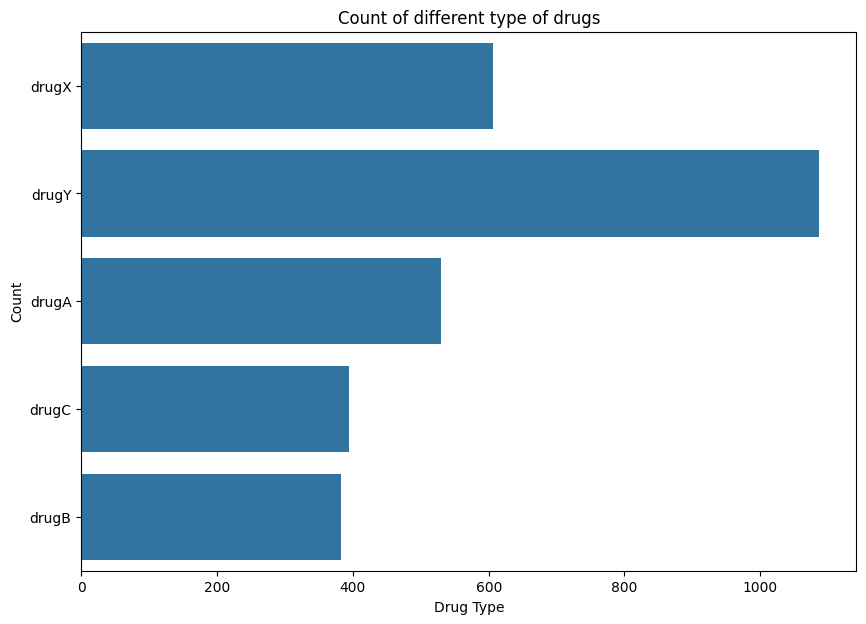

In [69]:
plt.figure(figsize=(10,7))
sns.countplot(drug_df["Drug"])
plt.title("Count of different type of drugs")
plt.xlabel("Drug Type")
plt.ylabel("Count")

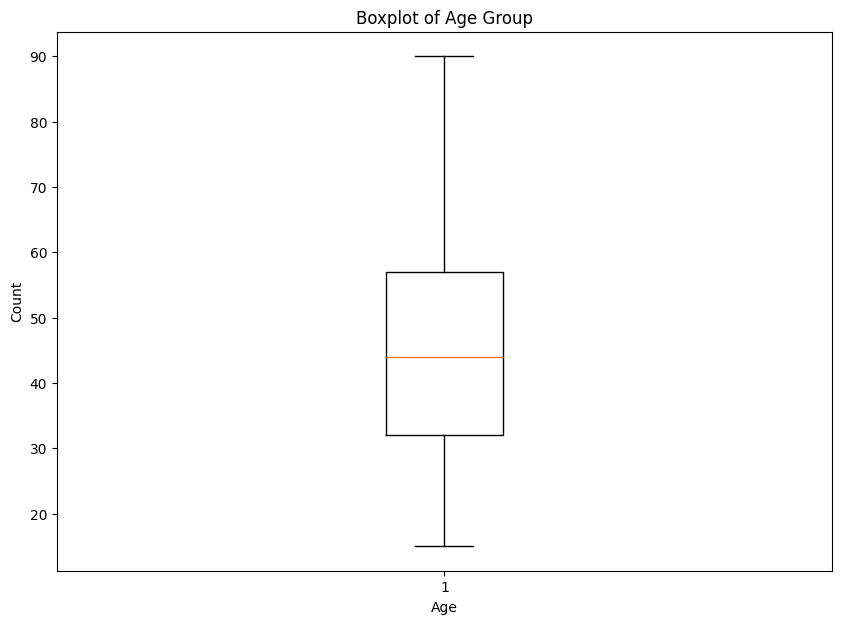

In [70]:
plt.figure(figsize=(10,7))
plt.boxplot(drug_df["Age"])
plt.title("Boxplot of Age Group")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

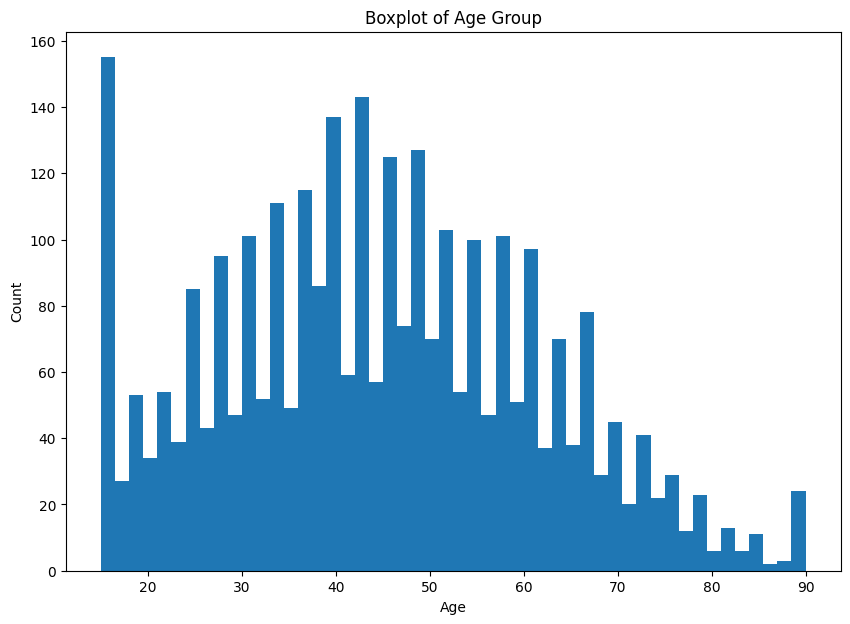

In [72]:
plt.figure(figsize=(10,7))
plt.hist(drug_df["Age"], bins=50)
plt.title("Boxplot of Age Group")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

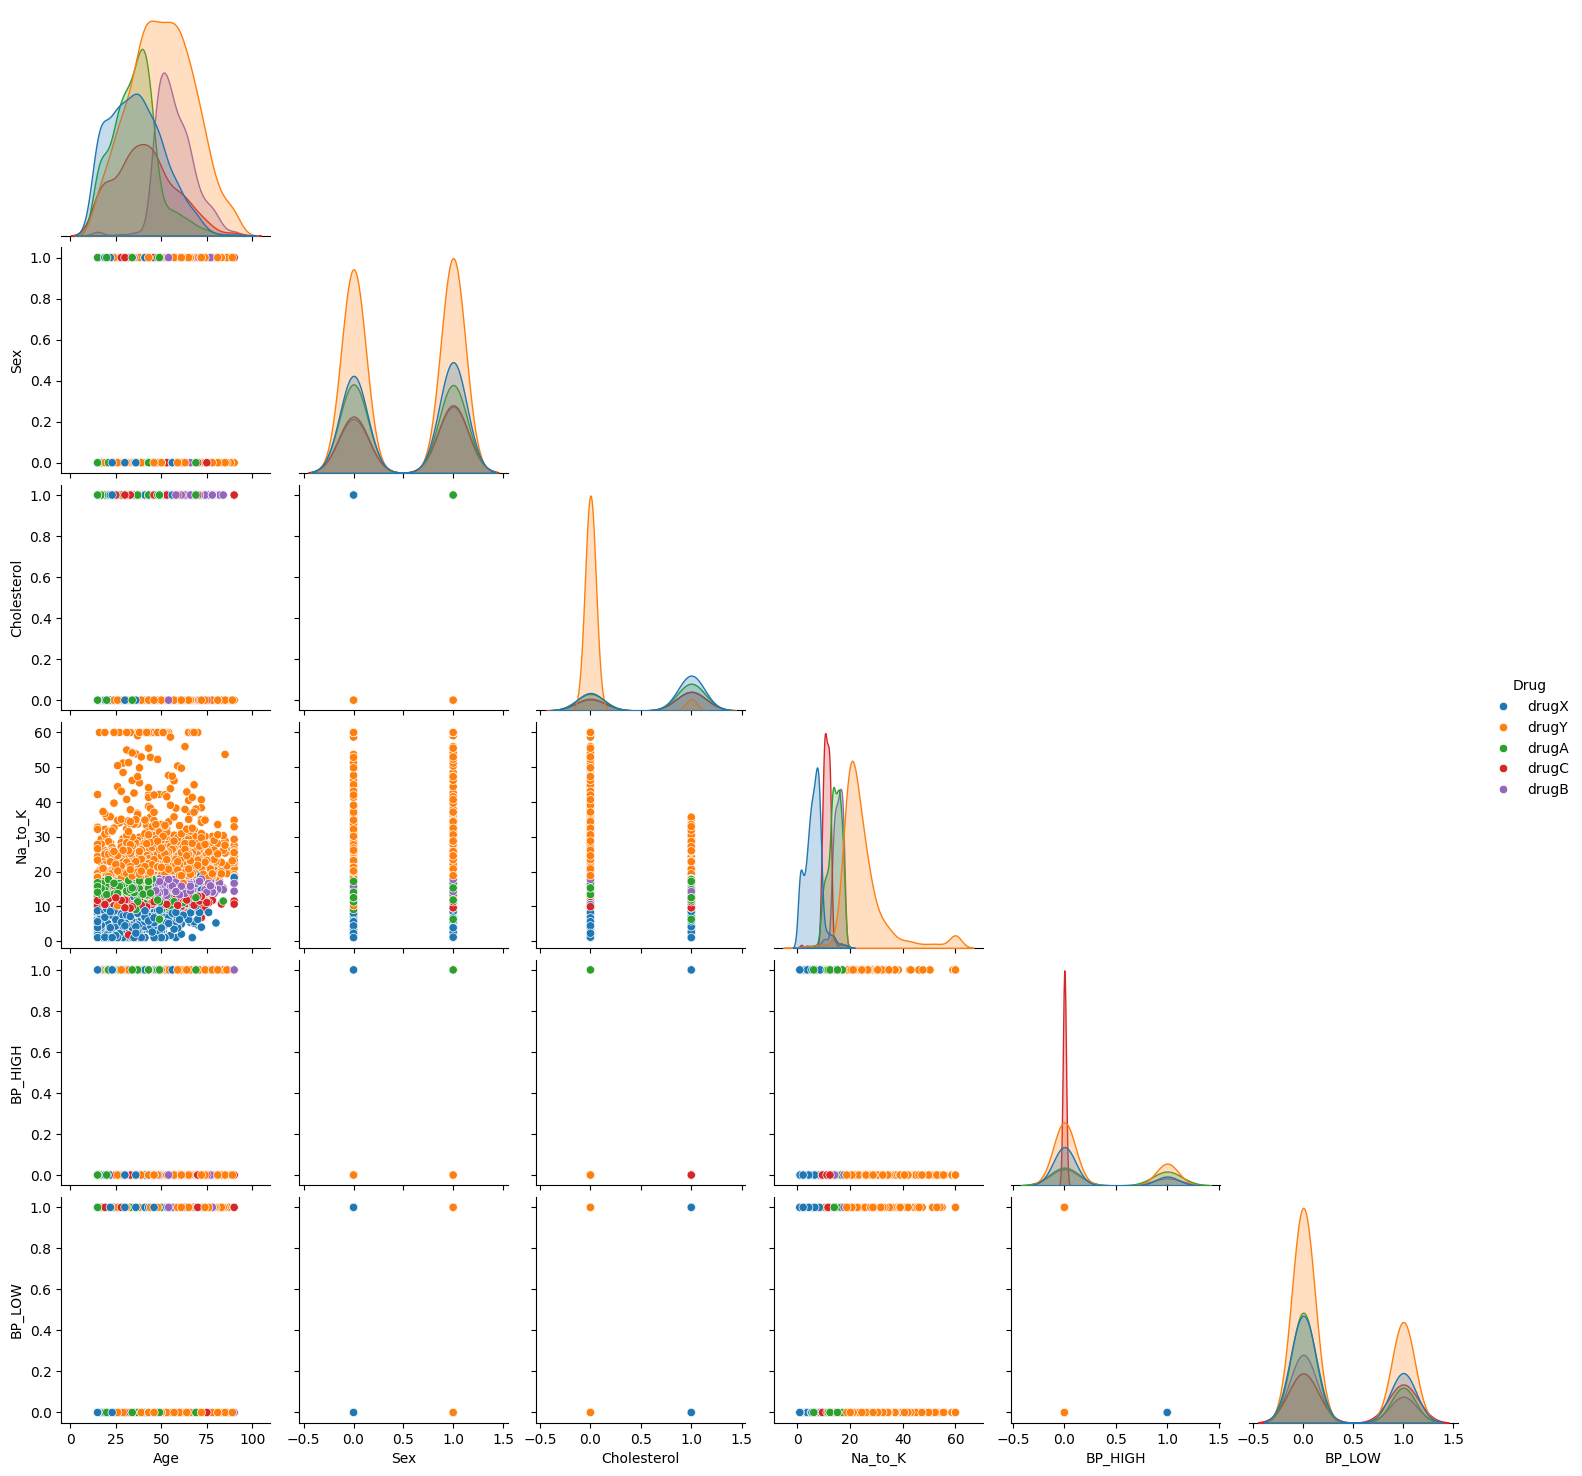

In [73]:
sns.pairplot(drug_df, hue='Drug', diag_kind='kde', corner=True)


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
X = drug_df.drop("Drug", axis=1)
y = drug_df["Drug"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3)

In [77]:
print(X_train.shape, X_test.shape)

(2100, 6) (900, 6)


In [78]:
print(y_train.shape, y_test.shape)

(2100,) (900,)


### Building ML Models

#### Bagging Classifier Model 

In [94]:
from sklearn.ensemble import BaggingClassifier

In [95]:
bg_clf = BaggingClassifier(n_estimators=11)

In [96]:
bg_clf.fit(X_train, y_train)

,estimator,None
,n_estimators,11
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [97]:
y_preds_bg = bg_clf.predict(X_test)

In [98]:
print(accuracy_score(y_test, y_preds_bg))

0.9422222222222222


Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier Model')

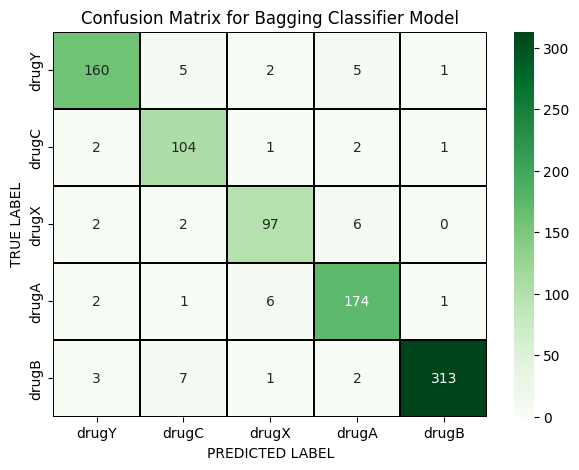

In [99]:
cm = confusion_matrix(y_test, y_preds_bg)

x_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
y_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier Model')

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

base_tree = DecisionTreeClassifier(random_state=42)

bg_clf = BaggingClassifier(
    estimator=base_tree,
    random_state=42
)



In [104]:

param_grid = {
    'n_estimators': [5, 10],
    'max_samples': [0.5, 0.7],
    'max_features': [0.5, 0.7],
    'estimator__max_depth': [ 5, 10],
    'estimator__min_samples_split': [2, 5],
}
grid_search = GridSearchCV(
    estimator=bg_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [105]:

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END estimator__max_depth=5, estimator__min_samples_split=2, max_features=0.5, max_samples=0.5, n_estimators=5; total time=   0.0s
[CV] END estimator__max_depth=5, estimator__min_samples_split=2, max_features=0.5, max_samples=0.5, n_estimators=5; total time=   0.0s
[CV] END estimator__max_depth=5, estimator__min_samples_split=2, max_features=0.5, max_samples=0.5, n_estimators=5; total time=   0.0s
[CV] END estimator__max_depth=5, estimator__min_samples_split=2, max_features=0.5, max_samples=0.5, n_estimators=5; total time=   0.0s
[CV] END estimator__max_depth=5, estimator__min_samples_split=2, max_features=0.5, max_samples=0.5, n_estimators=5; total time=   0.0s
[CV] END estimator__max_depth=5, estimator__min_samples_split=2, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END estimator__max_depth=5, estimator__min_samples_split=2, max_features=0.5, max_samples=0.5, n_estimators=10; total time

In [106]:

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

       drugA       0.95      0.96      0.95       173
       drugB       0.90      0.97      0.93       110
       drugC       0.92      0.93      0.93       107
       drugX       0.96      0.95      0.95       184
       drugY       0.99      0.96      0.98       326

    accuracy                           0.96       900
   macro avg       0.94      0.95      0.95       900
weighted avg       0.96      0.96      0.96       900



#### Decision Tree Model

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dt_clf = DecisionTreeClassifier()

In [109]:
dt_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [110]:
y_preds_dt = dt_clf.predict(X_test)

In [111]:
print(accuracy_score(y_test, y_preds_dt))

0.9033333333333333


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier Model')

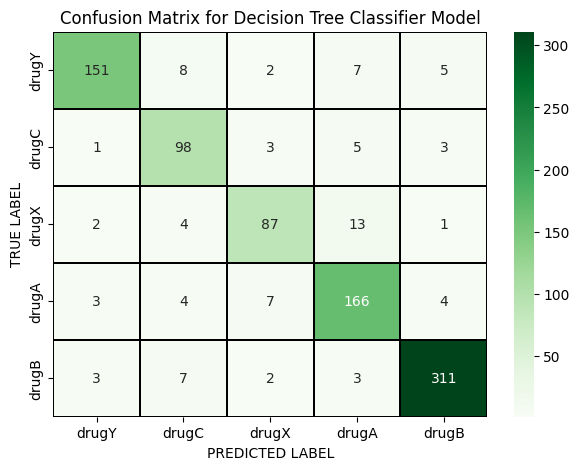

In [112]:
cm = confusion_matrix(y_test, y_preds_dt)

x_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
y_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier Model')

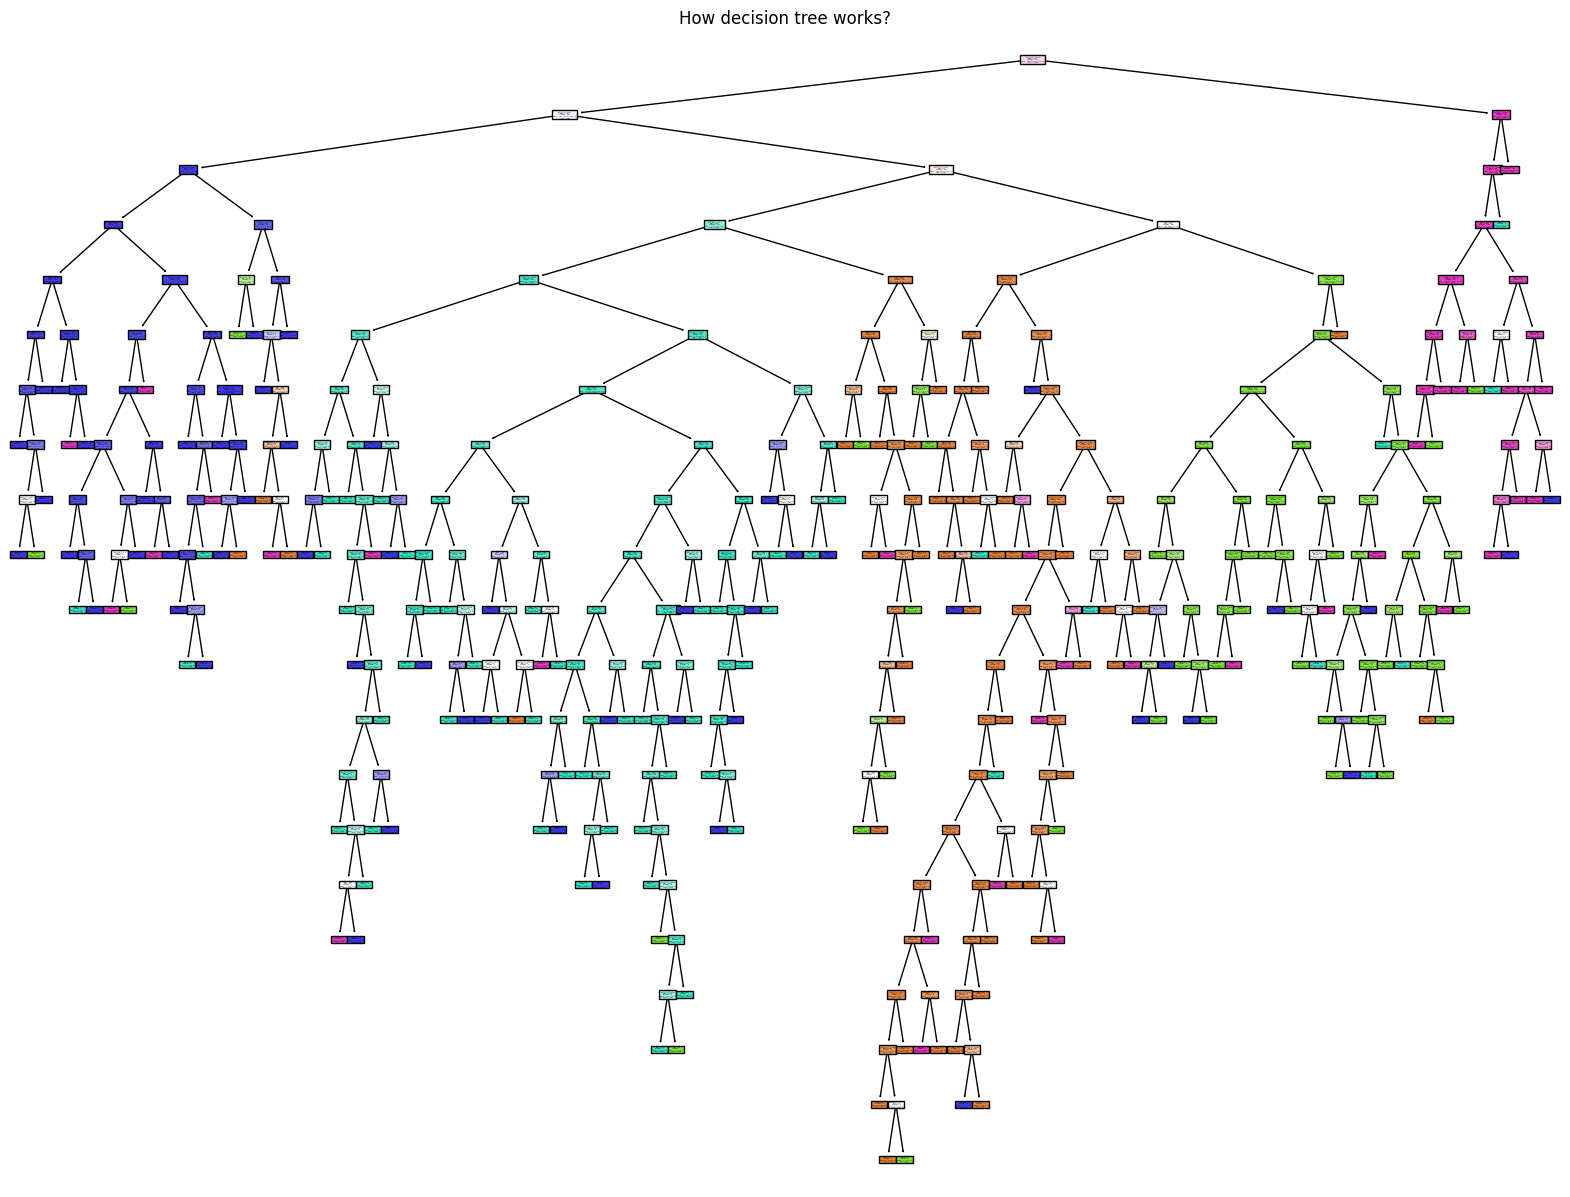

In [113]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt_clf, feature_names = list(X), class_names = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], filled = True)
plt.title('How decision tree works?')
plt.show()

In [117]:

dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)


In [118]:

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total

In [119]:

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Test Accuracy: 0.9577777777777777

Classification Report:
               precision    recall  f1-score   support

       drugA       0.94      0.97      0.96       173
       drugB       0.91      0.97      0.94       110
       drugC       0.92      0.94      0.93       107
       drugX       0.96      0.95      0.95       184
       drugY       1.00      0.96      0.98       326

    accuracy                           0.96       900
   macro avg       0.95      0.96      0.95       900
weighted avg       0.96      0.96      0.96       900


Confusion Matrix:
 [[168   0   2   3   0]
 [  2 107   0   1   0]
 [  2   2 101   2   0]
 [  2   1   6 174   1]
 [  4   7   1   2 312]]


# RandomForestClassifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)



In [121]:

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.95
              precision    recall  f1-score   support

       drugA       0.94      0.97      0.95       173
       drugB       0.91      0.95      0.93       110
       drugC       0.91      0.91      0.91       107
       drugX       0.93      0.95      0.94       184
       drugY       0.99      0.96      0.97       326

    accuracy                           0.95       900
   macro avg       0.94      0.95      0.94       900
weighted avg       0.95      0.95      0.95       900



In [122]:
param_grid = {
    'n_estimators': [5,20],
    'max_depth': [6, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=5; total time=   0.0s
[C

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [6, 10], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,20


In [123]:

print("Best RF Params:", grid_search_rf.best_params_)
print("Best CV Accuracy:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Best RF Params: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
Best CV Accuracy: 0.9480952380952381

Test Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

       drugA       0.95      0.96      0.95       173
       drugB       0.89      0.97      0.93       110
       drugC       0.92      0.93      0.93       107
       drugX       0.96      0.95      0.95       184
       drugY       1.00      0.96      0.98       326

    accuracy                           0.96       900
   macro avg       0.94      0.95      0.95       900
weighted avg       0.96      0.96      0.96       900



KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)


In [125]:

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8911111111111111
              precision    recall  f1-score   support

       drugA       0.85      0.81      0.83       173
       drugB       0.82      0.90      0.86       110
       drugC       0.72      0.84      0.78       107
       drugX       0.94      0.91      0.93       184
       drugY       0.98      0.94      0.96       326

    accuracy                           0.89       900
   macro avg       0.86      0.88      0.87       900
weighted avg       0.90      0.89      0.89       900



In [126]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)



In [127]:

grid_search_knn.fit(X_train, y_train)

print("Best KNN Params:", grid_search_knn.best_params_)
print("Best CV Accuracy:", grid_search_knn.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, we

In [128]:

best_knn = grid_search_knn.best_estimator_
y_pred_knn_best = best_knn.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_knn_best))
print(classification_report(y_test, y_pred_knn_best))


Test Accuracy: 0.8944444444444445
              precision    recall  f1-score   support

       drugA       0.90      0.83      0.86       173
       drugB       0.80      0.87      0.83       110
       drugC       0.73      0.85      0.78       107
       drugX       0.95      0.91      0.93       184
       drugY       0.96      0.94      0.95       326

    accuracy                           0.89       900
   macro avg       0.87      0.88      0.87       900
weighted avg       0.90      0.89      0.90       900



SVM

In [129]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)


In [130]:

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.86
              precision    recall  f1-score   support

       drugA       0.80      0.73      0.76       173
       drugB       0.74      0.85      0.79       110
       drugC       0.70      0.70      0.70       107
       drugX       0.93      0.94      0.94       184
       drugY       0.94      0.94      0.94       326

    accuracy                           0.86       900
   macro avg       0.82      0.83      0.83       900
weighted avg       0.86      0.86      0.86       900



In [135]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)


In [136]:

grid_search_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_search_svm.best_params_)
print("Best CV Accuracy:", grid_search_svm.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...................C=0.1, gamma=auto, k

In [137]:

best_svm = grid_search_svm.best_estimator_
y_pred_svm_best = best_svm.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_svm_best))
print(classification_report(y_test, y_pred_svm_best))



Test Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

       drugA       0.92      0.88      0.90       173
       drugB       0.86      0.89      0.88       110
       drugC       0.80      0.88      0.84       107
       drugX       0.92      0.92      0.92       184
       drugY       0.97      0.95      0.96       326

    accuracy                           0.92       900
   macro avg       0.90      0.91      0.90       900
weighted avg       0.92      0.92      0.92       900



In [138]:
from joblib import dump
MODEL_NAME = "drug-recommender.pkl"
dump(best_rf, MODEL_NAME)

['drug-recommender.pkl']

### THE END